In [57]:
import pandas as pd
df = pd.read_csv('datos2.csv', names=['date', 'open', 'high', 'low', 'close', 'volume', 'unknown'])
df = df[['date', 'open', 'high', 'low', 'close']]
df

,date,open,high,low,close
0,2011.08.08 00:00,1170.90,1188.60,1099.80,1104.60
1,2011.08.09 00:00,1104.30,1178.30,1077.10,1175.60
2,2011.08.10 00:00,1175.30,1177.10,1113.60,1123.10
3,2011.08.11 00:00,1123.60,1183.60,1103.20,1166.10
4,2011.08.12 00:00,1166.20,1186.30,1146.60,1176.70
...,...,...,...,...,...
36494,2022.05.12 19:00,3894.65,3930.76,3889.39,3912.12
36495,2022.05.12 20:00,3911.87,3917.72,3871.16,3877.61
36496,2022.05.12 21:00,3877.11,3886.50,3858.58,3864.76
36497,2022.05.12 22:00,3865.01,3933.47,3860.84,3931.72


In [58]:
df['MA_100'] = df.close.rolling(100).mean()
df['type'] = df.apply(lambda x: 'sell' if x.close < x.MA_100 else 'buy', axis=1)
df.tail(10)

,date,open,high,low,close,MA_100,type
36489,2022.05.12 14:00,3915.65,3927.90,3888.06,3893.08,4027.8359,sell
36490,2022.05.12 15:00,3892.95,3912.22,3889.01,3902.75,4025.4104,sell
36491,2022.05.12 16:00,3902.50,3919.00,3876.49,3893.07,4022.8883,sell
36492,2022.05.12 17:00,3892.71,3949.65,3880.87,3947.17,4020.9445,sell
36493,2022.05.12 18:00,3947.18,3965.08,3894.64,3894.89,4018.5427,sell
36494,2022.05.12 19:00,3894.65,3930.76,3889.39,3912.12,4016.3453,sell
36495,2022.05.12 20:00,3911.87,3917.72,3871.16,3877.61,4013.7221,sell
36496,2022.05.12 21:00,3877.11,3886.50,3858.58,3864.76,4011.0292,sell
36497,2022.05.12 22:00,3865.01,3933.47,3860.84,3931.72,4009.0663,sell
36498,2022.05.12 23:00,3932.54,3933.51,3922.29,3922.79,4007.1107,sell


In [59]:
def open_position(row):
    condition = (
        row.open > row.MA_100 > row.close
        or
        row.open < row.MA_100 < row.close
    )
    return row.close if condition else None

def close_position(row):
    condition = (
        row.open > row.MA_100 > row.close
        or
        row.open < row.MA_100 < row.close
    )
    return row.close if condition else None

df['OP_O'] = df.apply(lambda x: open_position(x), axis=1)
df['OP_C'] = df.apply(lambda x: close_position(x), axis=1)
df

,date,open,high,low,close,MA_100,type,OP_O,OP_C
0,2011.08.08 00:00,1170.90,1188.60,1099.80,1104.60,NaN,buy,NaN,NaN
1,2011.08.09 00:00,1104.30,1178.30,1077.10,1175.60,NaN,buy,NaN,NaN
2,2011.08.10 00:00,1175.30,1177.10,1113.60,1123.10,NaN,buy,NaN,NaN
3,2011.08.11 00:00,1123.60,1183.60,1103.20,1166.10,NaN,buy,NaN,NaN
4,2011.08.12 00:00,1166.20,1186.30,1146.60,1176.70,NaN,buy,NaN,NaN
...,...,...,...,...,...,...,...,...,...
36494,2022.05.12 19:00,3894.65,3930.76,3889.39,3912.12,4016.3453,sell,NaN,NaN
36495,2022.05.12 20:00,3911.87,3917.72,3871.16,3877.61,4013.7221,sell,NaN,NaN
36496,2022.05.12 21:00,3877.11,3886.50,3858.58,3864.76,4011.0292,sell,NaN,NaN
36497,2022.05.12 22:00,3865.01,3933.47,3860.84,3931.72,4009.0663,sell,NaN,NaN


In [112]:
results = df[['date', 'OP_O', 'OP_C', 'type']]
results = results.dropna().reset_index(drop=True)

def total_minus(x):
    if (str(x.name) == '0'):
        return None
    previous = results.loc[int(x.name) - 1]
    value = x.OP_C - previous.OP_O
    return value * (-1) if previous.type == 'sell' else value

results['total'] = results.apply(lambda x: total_minus(x), axis=1)
results['total_2'] = results.total.cumsum()
results


,date,OP_O,OP_C,type,total,total_2
0,2012.05.07 00:00,1370.40,1370.40,buy,NaN,NaN
1,2012.05.08 00:00,1361.50,1361.50,sell,-8.90,-8.90
2,2012.06.29 00:00,1364.20,1364.20,buy,-2.70,-11.60
3,2012.07.06 00:00,1357.40,1357.40,sell,-6.80,-18.40
4,2012.07.13 00:00,1357.70,1357.70,buy,-0.30,-18.70
...,...,...,...,...,...,...
1738,2022.04.28 19:00,4267.49,4267.49,buy,-16.86,1929.45
1739,2022.04.29 17:00,4219.09,4219.09,sell,-48.40,1881.05
1740,2022.05.04 13:00,4190.50,4190.50,sell,28.59,1909.64
1741,2022.05.04 19:00,4191.76,4191.76,buy,-1.26,1908.38


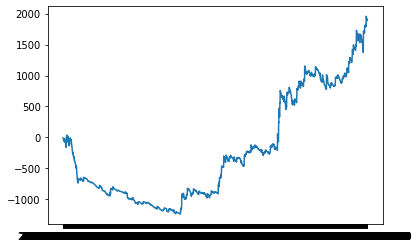

In [113]:
import matplotlib.pyplot as plt


plt.plot(results.date, results.total_2)
plt.show()